In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make the plots appear  inside the notebook
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

## Load data

In [6]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## Eploratory data Analysis (EDA)

1. what questionns are you trying to solve
2. what kind of data do we have and what are the types
3. how do we deal with missing data
4. what are the outliers
5. how to add, remove or change features to get more out of my dataset

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# find how many of each class of the targets do we have
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

from above we can see that is a relatively balanced classification problem

<AxesSubplot:>

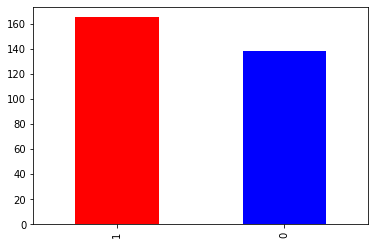

In [11]:
df['target'].value_counts().plot(kind='bar',color=['red', 'blue'])

In [12]:
# get information about the available columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## finding patterns
done by comparing different columns

In [16]:
# comparing sex with target
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


the above means that 72 women  have heard disease, 24 women do not
93 men have hard disease, 114 do not have

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

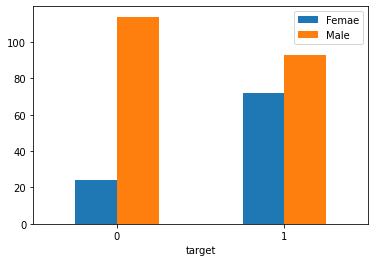

In [20]:
# create a plot of the cross tab
pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.legend(['Femae', 'Male'])
plt.xticks(rotation=0)

## Compare age, thalach with target

In [21]:
df['thalach'].value_counts

<bound method IndexOpsMixin.value_counts of 0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64>

thalach has a lots values so a bar graph will not be convenient

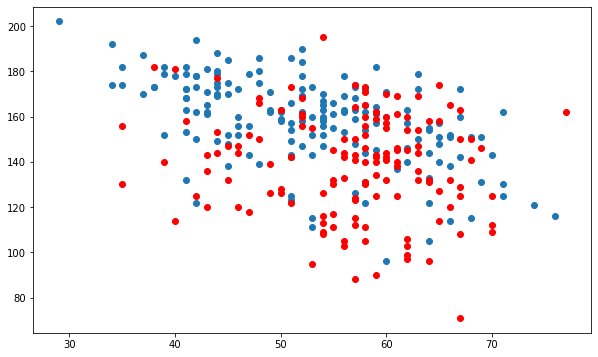

In [25]:
plt.figure(figsize=(10,6))

# scatter with positive example
plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1]) # age where target == 1

# scatter with positive example
plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0],c='red') 
plt.title('Heart disease as a function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

from above, we can see a downward trend

## Check distribution  of age

<AxesSubplot:ylabel='Frequency'>

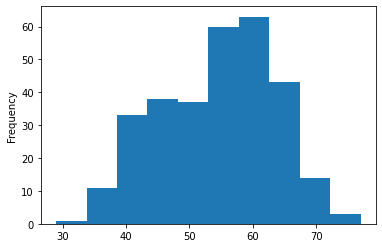

In [26]:
df.age.plot.hist()

## Heart disease frequency per chest pain type

In [27]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

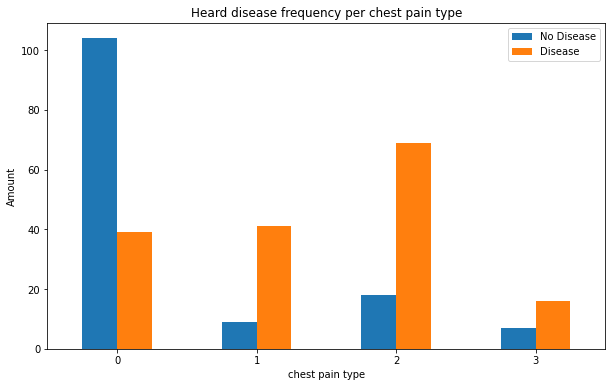

In [30]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6))
plt.title('Heard disease frequency per chest pain type')
plt.xlabel("chest pain type")
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)